In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

## Work only with square matrix

In [2]:
# Cheking on pow 2 of matrix dimension. If not - add to it
def matrix_addition(matrix):
    if int(np.log2(matrix.shape[0])) != np.log2(matrix.shape[0]):
        size = 2**math.ceil(np.log2(matrix.shape[0]))
        new_matrix = np.zeros((size, size))
        new_matrix[:matrix.shape[0], :matrix.shape[0]] = matrix
        for i in range(matrix.shape[0], size, 1):
            for j in range(matrix.shape[0], size, 1):
                if i == j:
                    new_matrix[i,j] = 1
                else:
                    new_matrix[i,j] = 0
        return new_matrix
    return matrix

In [3]:
def creating_random_square_matrix(n):
    matrix = np.zeros((n,n))
    for i in tqdm(range(n)):
        for j in range(n):
            matrix[i,j] = np.random.randint(100)
    return matrix

In [4]:
def classic_matrix_multiplier(matrix1, matrix2):
    if (matrix1.shape[0] != matrix1.shape[1]) or (matrix2.shape[0] != matrix2.shape[1]) or (matrix1.shape[0] != matrix2.shape[0]):
        print('Expected square matrix the same size')
        return
    size = matrix1.shape[0]
    C = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            C[i,j] = 0
            for k in range(size):
                C[i,j] = C[i,j] + matrix1[i, k] * matrix2[k, j]
    return C

In [5]:
matrix1 = creating_random_square_matrix(4)
matrix1

100%|██████████| 4/4 [00:00<?, ?it/s]


array([[79., 93.,  8.,  6.],
       [12., 98., 87., 96.],
       [44.,  9.,  3.,  1.],
       [15., 99., 47., 21.]])

In [6]:
matrix2 = creating_random_square_matrix(4)
matrix2

100%|██████████| 4/4 [00:00<00:00, 4009.85it/s]


array([[97., 33., 28.,  6.],
       [85., 47., 12., 87.],
       [60., 69.,  3., 98.],
       [12., 62., 16., 96.]])

In [7]:
def Strassen_alorithm(matrix1, matrix2):

    # Cheking on pow 2 of matrix dimension. If not - add to it
    def matrix_addition(matrix):
        if int(np.log2(matrix.shape[0])) != np.log2(matrix.shape[0]):
            size = 2**math.ceil(np.log2(matrix.shape[0]))
            new_matrix = np.zeros((size, size))
            new_matrix[:matrix.shape[0], :matrix.shape[0]] = matrix
            for i in range(matrix.shape[0], size, 1):
                for j in range(matrix.shape[0], size, 1):
                    if i == j:
                        new_matrix[i,j] = 1
                    else:
                        new_matrix[i,j] = 0
            return new_matrix
        return matrix

    def split_matrix(matrix):
        a = matrix[:matrix.shape[0]//2, :matrix.shape[0]//2]
        b = matrix[:matrix.shape[0]//2, matrix.shape[0]//2:]
        c = matrix[matrix.shape[0]//2:, :matrix.shape[0]//2]
        d = matrix[matrix.shape[0]//2:, matrix.shape[0]//2:]
        return a,b,c,d

    def multiplier(matrix1, matrix2):
        n = matrix1.shape[0]
        Z = np.zeros((n, n))
        if n == 1:
            Z[0,0] = matrix1[0,0] * matrix2[0,0]
            return Z
        else:
            a,b,c,d = split_matrix(matrix1)
            e, g, f, h = split_matrix(matrix2)

            # #p1 = a*g - a*h
            # p1 = multiplier(a, g) - multiplier(a, h)
            #
            # #p2 = a*h + b*h
            # p2 = multiplier(a, h) + multiplier(b, h)
            #
            # #p3 = c*e + d * e
            # p3 = multiplier(c, e) + multiplier(d, e)
            #
            # #p4 = d*f - d*e
            # p4 = multiplier(d, f) - multiplier(d, e)
            #
            # #p5 = a*e + a*h + d*e + d*h
            # p5 = multiplier(a, e) + multiplier(a, h) + multiplier(d, e) + multiplier(d,h)
            #
            # #p6 = b*f + b*h - d*f - d*h
            # p6 = multiplier(b, f) + multiplier(b, h) - multiplier(d, f) - multiplier(d, h)
            #
            # #p7 = a*e + a*g − c*e − c*g
            # p7 = multiplier(a, e) + multiplier(a, g) - multiplier(c, e) - multiplier(c, g)

            #r = P5 + P4 − P2 + P6 = ae + bf
            r = multiplier(a, e) + multiplier(b, f)

            #s = P1 + P2 = ag + bh
            s = multiplier(a, g) + multiplier(b, h)

            #t = P3 + P4 = ce + df
            t = multiplier(c, e) + multiplier(d, f)

            #u = P5 + P1 − P3 − P7 = cg + dh
            u = multiplier(c, g) + multiplier(d, h)

            Z[:n//2, :n//2] = r
            Z[:n//2, n//2:] = s
            Z[n//2:, :n//2] = t
            Z[n//2:, n//2:] = u

            return Z
    return multiplier(matrix_addition(matrix1), matrix_addition(matrix2))


Strassen_alorithm(matrix1, matrix2)

array([[16120.,  7902.,  3448.,  9925.],
       [15866., 16957.,  3309., 26340.],
       [ 5225.,  2144.,  1365.,  1437.],
       [12942.,  9693.,  2085., 15325.]])

In [8]:
classic_matrix_multiplier(matrix1, matrix2)

array([[16120.,  7902.,  3448.,  9925.],
       [15866., 16957.,  3309., 26340.],
       [ 5225.,  2144.,  1365.,  1437.],
       [12942.,  9693.,  2085., 15325.]])

In [9]:
def Vinograd_Strassen_alorithm(matrix1, matrix2):

    # Cheking on pow 2 of matrix dimension. If not - add to it
    def matrix_addition(matrix):
        if int(np.log2(matrix.shape[0])) != np.log2(matrix.shape[0]):
            size = 2**math.ceil(np.log2(matrix.shape[0]))
            new_matrix = np.zeros((size, size))
            new_matrix[:matrix.shape[0], :matrix.shape[0]] = matrix
            for i in range(matrix.shape[0], size, 1):
                for j in range(matrix.shape[0], size, 1):
                    if i == j:
                        new_matrix[i,j] = 1
                    else:
                        new_matrix[i,j] = 0
            return new_matrix
        return matrix

    def split_matrix(matrix):
        a = matrix[:matrix.shape[0]//2, :matrix.shape[0]//2]
        b = matrix[:matrix.shape[0]//2, matrix.shape[0]//2:]
        c = matrix[matrix.shape[0]//2:, :matrix.shape[0]//2]
        d = matrix[matrix.shape[0]//2:, matrix.shape[0]//2:]
        return a,b,c,d

    def multiplier(matrix1, matrix2):
        n = matrix1.shape[0]
        Z = np.zeros((n, n))
        if n == 1:
            Z[0,0] = matrix1[0,0] * matrix2[0,0]
            return Z
        else:
            a,b,c,d = split_matrix(matrix1)
            e, g, f, h = split_matrix(matrix2)

            s1 = c + d
            s2 = s1 - a
            s3 = a - c
            s4 = b - s2
            s5 = g - e
            s6 = h - s5
            s7 = h - g
            s8 = s6 - f

            p1 = multiplier(s2, s6)
            p2 = multiplier(a, e)
            p3 = multiplier(b, f)
            p4 = multiplier(s3, s7)
            p5 = multiplier(s1, s5)
            p6 = multiplier(s4, h)
            p7 = multiplier(d, s8)

            t1 = p1 + p2
            t2 = t1 + p4

            r = p2 + p3
            s = t1 + p5 + p6
            t = t1 - p7
            u = t2 + p5

            Z[:n//2, :n//2] = r
            Z[:n//2, n//2:] = s
            Z[n//2:, :n//2] = t
            Z[n//2:, n//2:] = u

            return Z
    return multiplier(matrix_addition(matrix1), matrix_addition(matrix2))


Vinograd_Strassen_alorithm(matrix1, matrix2)

array([[16120.,  7902.,  3448.,  9925.],
       [14375., 16957., -2276., 26340.],
       [ 5764., -1832.,  1365.,  1437.],
       [ 9003.,  9978.,  -352., 15325.]])

In [10]:
dataset = []

for n in range(0,16,1):
    matrix1 = creating_random_square_matrix(2**n)
    matrix2 = creating_random_square_matrix(2**n)
    tmp = []
    for name, method in tqdm(zip(
            ["Classic multiplier", "Original Strassen", "Vinograd-Strassen"],
            [classic_matrix_multiplier, Strassen_alorithm, Vinograd_Strassen_alorithm])):
        times = 0
        for j in range(1):
            start = time.perf_counter()
            method(matrix1, matrix2)
            times += time.perf_counter() - start
        times /= 1
        dataset.append({f'{name}':times, 'n':n})
        kek = pd.DataFrame(dataset)
        kek.to_csv('2pow.csv')

100%|██████████| 1/1 [00:00<?, ?it/s]
3it [00:00, 429.71it/s]
100%|██████████| 2/2 [00:00<?, ?it/s]
3it [00:00, 601.51it/s]
100%|██████████| 4/4 [00:00<?, ?it/s]
3it [00:00, 601.77it/s]
100%|██████████| 8/8 [00:00<00:00, 8031.22it/s]
3it [00:00, 376.06it/s]
100%|██████████| 16/16 [00:00<00:00, 8022.58it/s]
3it [00:00, 103.73it/s]
100%|██████████| 32/32 [00:00<00:00, 10693.79it/s]
3it [00:00, 16.00it/s]
100%|██████████| 64/64 [00:00<00:00, 5834.03it/s]
3it [00:01,  2.16it/s]
100%|██████████| 128/128 [00:00<00:00, 3888.26it/s]
3it [00:08,  2.91s/it]
100%|██████████| 256/256 [00:00<00:00, 2037.21it/s]
3it [00:59, 19.68s/it]
100%|██████████| 512/512 [00:00<00:00, 1049.27it/s]
3it [07:30, 150.09s/it]
100%|██████████| 1024/1024 [00:01<00:00, 528.50it/s]
3it [58:19, 1166.54s/it]
100%|██████████| 2048/2048 [00:07<00:00, 261.55it/s]
3it [7:20:31, 8810.54s/it] 
100%|██████████| 4096/4096 [00:30<00:00, 133.91it/s]
1it [28:22:19, 102139.08s/it]


KeyboardInterrupt: 

In [11]:
kek = pd.DataFrame(dataset)
kek

,Classic multiplier,n,Original Strassen,Vinograd-Strassen
0,0.000012,0,NaN,NaN
1,NaN,0,0.000026,NaN
2,NaN,0,NaN,0.000017
3,0.000019,1,NaN,NaN
4,NaN,1,0.000045,NaN
5,NaN,1,NaN,0.000048
6,0.000048,2,NaN,NaN
7,NaN,2,0.000373,NaN
8,NaN,2,NaN,0.000220
9,0.000283,3,NaN,NaN


In [139]:
# kek.to_csv('results.csv')

In [13]:
kek[['Original Strassen', 'n']].dropna().values[:, 0]

array([2.64000000e-05, 4.50000000e-05, 3.72700000e-04, 1.36220000e-03,
       1.12838000e-02, 9.18287000e-02, 7.67100100e-01, 4.59442230e+00,
       3.28959435e+01, 2.58427399e+02, 2.08698932e+03, 1.61046337e+04])

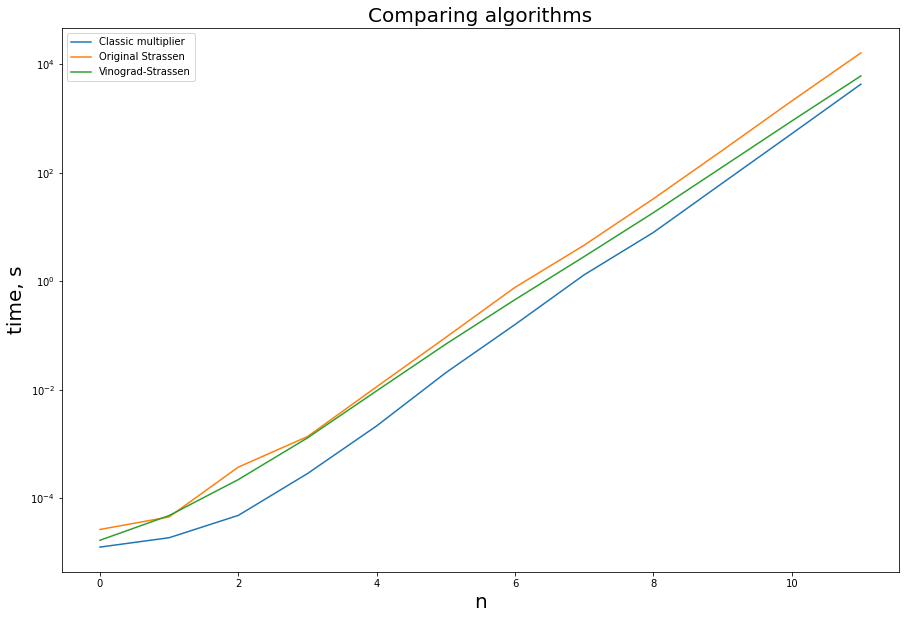

In [15]:
plt.figure(figsize=(15, 10))
plt.plot(kek[['Classic multiplier', 'n']].dropna().values[:-1, 1], kek[['Classic multiplier', 'n']].dropna().values[:-1, 0], label="Classic multiplier")
plt.plot(kek[['Original Strassen', 'n']].dropna().values[:, 1], kek[['Original Strassen', 'n']].dropna().values[:, 0], label="Original Strassen")
plt.plot(kek[['Vinograd-Strassen', 'n']].dropna().values[:, 1], kek[['Vinograd-Strassen', 'n']].dropna().values[:, 0], label="Vinograd-Strassen")
plt.title('Comparing algorithms', fontdict={'size':20})
plt.xlabel('n', fontdict={'size':20})
plt.ylabel('time, s', fontdict={'size':20})
plt.legend()
plt.yscale('log')
plt.savefig('../Pictures/task8_Comparing algorithms_2pow_log', bbox_inches='tight')
plt.show()

In [17]:
def cubic_est(x, a):
    return a * (x**3)
from scipy.optimize import curve_fit

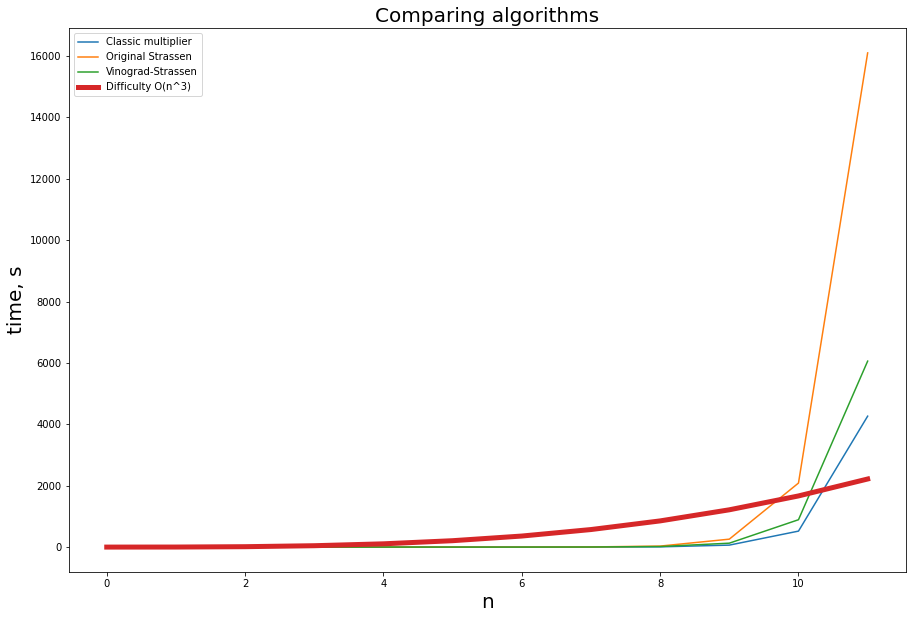

In [20]:
plt.figure(figsize=(15, 10))
plt.plot(kek[['Classic multiplier', 'n']].dropna().values[:-1, 1], kek[['Classic multiplier', 'n']].dropna().values[:-1, 0], label="Classic multiplier")
popt, _ = curve_fit(cubic_est, kek[['Classic multiplier', 'n']].dropna().values[:-1, 1], kek[['Classic multiplier', 'n']].dropna().values[:-1, 0])
plt.plot(kek[['Original Strassen', 'n']].dropna().values[:, 1], kek[['Original Strassen', 'n']].dropna().values[:, 0], label="Original Strassen")
plt.plot(kek[['Vinograd-Strassen', 'n']].dropna().values[:, 1], kek[['Vinograd-Strassen', 'n']].dropna().values[:, 0], label="Vinograd-Strassen")
plt.plot(kek[['Classic multiplier', 'n']].dropna().values[:-1, 1], cubic_est(kek[['Classic multiplier', 'n']].dropna().values[:-1, 1], *popt), label="Difficulty O(n^3)", linewidth="5")
plt.title('Comparing algorithms', fontdict={'size':20})
plt.xlabel('n', fontdict={'size':20})
plt.ylabel('time, s', fontdict={'size':20})
plt.legend()
# plt.yscale('log')
plt.savefig('../Pictures/task8_Matrix', bbox_inches='tight')
plt.show()

In [181]:
start = time.perf_counter()
Strassen_alorithm(matrix1, matrix2)
time.perf_counter() - start

array([[ 9895.,  7593., 11664., 11137.],
       [14055.,  9619., 18236., 13758.],
       [ 8362., 11810.,  8520.,  8525.],
       [12334., 10406., 15804., 11653.]])

In [182]:
start = time.perf_counter()
np.dot(matrix1, matrix2)
time.perf_counter() - start

7.580000965390354e-05